In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/kaggle/input/car-dataset/CAR DETAILS FROM CAR DEKHO.csv')
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [4]:
len(df)

4340

In [5]:
df.shape

(4340, 8)

The dataset contains 4340 rows and 8 columns. 

In [6]:
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


This code gives us numeric values.

In [7]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [8]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

In [9]:
df[df.duplicated()].count().sum()

6104

This code returns the total number of duplicate rows present in the dataset.

In [10]:
df.drop_duplicates(inplace=True)

This code removes all the duplicate rows from the dataset and updates the DataFrame in place without creating a new one.

In [11]:
df[df.duplicated].count().sum()

0

This will give the total number of duplicate rows in the dataset.

**Importing Libraries**

In [12]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df['owner'].count()

3577

In [14]:
df['owner'].unique()

array(['First Owner', 'Second Owner', 'Fourth & Above Owner',
       'Third Owner', 'Test Drive Car'], dtype=object)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'First Owner'),
  Text(1, 0, 'Second Owner'),
  Text(2, 0, 'Fourth & Above Owner'),
  Text(3, 0, 'Third Owner'),
  Text(4, 0, 'Test Drive Car')])

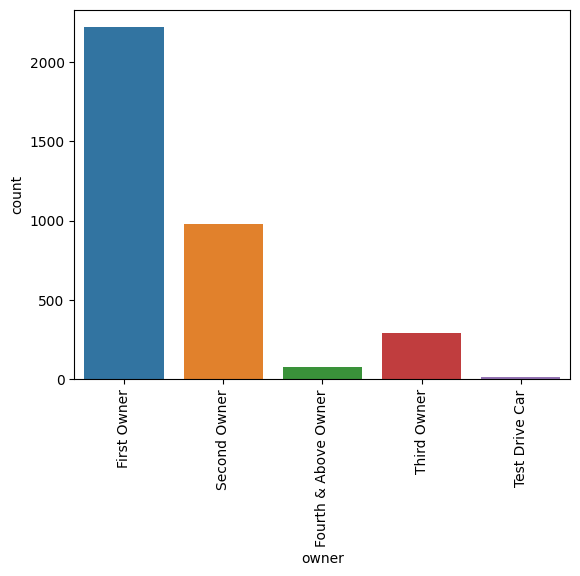

In [15]:
sns.countplot(x='owner', data=df)
plt.xticks(rotation=90)

This code shows the distribution of cars across 5 owner categories: First, Second, Third, Fourth & Above, and Test Drive Car.

In [16]:
a = df.groupby(['owner','year'])['name'].count()
a.sort_values(ascending = False)

owner                 year
First Owner           2017    316
                      2018    276
                      2015    242
                      2016    234
                      2014    196
                             ... 
Fourth & Above Owner  2015      1
                      2001      1
                      1992      1
First Owner           1999      1
Third Owner           2019      1
Name: name, Length: 97, dtype: int64

This code groups the dataset by owner and year, counts how many cars (name) fall into each group, and then sorts the result in descending order to show the most frequent combinations first.

In [17]:
s = df.groupby(['fuel', 'year'])['name'].count()
s.sort_values(ascending = False)

fuel      year
Diesel    2012    225
          2013    201
          2014    200
          2015    188
Petrol    2017    173
                 ... 
Diesel    2000      1
          1999      1
          1997      1
CNG       2009      1
Electric  2006      1
Name: name, Length: 75, dtype: int64

This code groups the dataset by fuel type and year, counts how many cars (name) are in each group, and then sorts them in descending order to highlight the most common fuel–year combinations.

In [18]:
df['name'].count()

3577

In [19]:
df['name'].apply(lambda x:x.split(' ')[0])

0        Maruti
1        Maruti
2       Hyundai
3        Datsun
4         Honda
         ...   
4335    Hyundai
4336    Hyundai
4337     Maruti
4338    Hyundai
4339    Renault
Name: name, Length: 3577, dtype: object

This code takes the name column and extracts only the first word (usually the car brand, like Maruti, Hyundai, Honda, etc.) from each entry.

In [20]:
df['brand'] = df['name'].apply(lambda x:x.split(' ')[0])

This code creates a new column brand in the dataset, which stores the first word from the car name (i.e., the car’s brand like Maruti, Hyundai, Honda, etc.).

In [21]:
df['model'] = df['name'].apply(lambda x:' '.join(x.split(' ')[:1]))

This code creates a new column model, but it currently stores only the first word (brand) from the car name.

In [22]:
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,brand,model
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti,Maruti
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti,Maruti
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai,Hyundai
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,Datsun,Datsun
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,Honda,Honda
...,...,...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner,Hyundai,Hyundai
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner,Hyundai,Hyundai
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner,Maruti,Maruti
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner,Hyundai,Hyundai


In [23]:
df.drop(['name'], axis=1)

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,brand,model
0,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti,Maruti
1,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti,Maruti
2,2012,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai,Hyundai
3,2017,250000,46000,Petrol,Individual,Manual,First Owner,Datsun,Datsun
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner,Honda,Honda
...,...,...,...,...,...,...,...,...,...
4335,2014,409999,80000,Diesel,Individual,Manual,Second Owner,Hyundai,Hyundai
4336,2014,409999,80000,Diesel,Individual,Manual,Second Owner,Hyundai,Hyundai
4337,2009,110000,83000,Petrol,Individual,Manual,Second Owner,Maruti,Maruti
4338,2016,865000,90000,Diesel,Individual,Manual,First Owner,Hyundai,Hyundai


In [24]:
a = df.groupby(['brand', 'year'])['brand'].count()
a.sort_values(ascending=False)

brand   year
Maruti  2017    109
        2015    100
        2018     92
        2014     90
        2016     82
               ... 
Land    2016      1
        2012      1
        2010      1
Kia     2019      1
Volvo   2018      1
Name: brand, Length: 288, dtype: int64

This code groups the dataset by brand and year, counts how many cars belong to each group, and then sorts the result in descending order to show the most frequent brand–year combinations first.

In [25]:
a = df.groupby(['transmission', 'year'])['brand'].count()
a.sort_values(ascending=False)

transmission  year
Manual        2012    314
              2015    309
              2014    301
              2017    289
              2013    278
              2016    261
              2018    243
              2011    228
              2010    200
              2009    158
              2019    134
              2008    124
              2007    112
              2006     84
              2005     61
Automatic     2017     57
              2018     52
Manual        2020     43
              2004     36
Automatic     2019     28
              2012     24
              2015     23
              2016     22
Manual        2003     21
Automatic     2014     20
              2013     20
              2011     19
Manual        2002     18
              2001     16
              2000     12
Automatic     2009     11
              2010     10
Manual        1999      9
Automatic     2006      9
Manual        1998      8
Automatic     2008      5
              2007      5
Manual        1997 

This code groups the dataset by transmission type and year, counts the number of cars in each group, and then sorts them in descending order to highlight the most common transmission–year combinations.

In [26]:
a = df.groupby(['seller_type', 'year'])['brand'].count()
a.sort_values(ascending=False)

seller_type       year
Individual        2012    272
                  2017    243
                  2015    235
                  2014    234
                  2018    228
                  2013    213
                  2011    208
                  2016    202
                  2010    187
                  2009    150
                  2019    141
                  2008    120
                  2007    102
Dealer            2017     94
                  2014     86
Individual        2006     86
Dealer            2015     85
                  2013     84
                  2016     74
                  2012     66
                  2018     64
Individual        2005     56
Dealer            2011     39
Individual        2004     35
                  2020     30
Dealer            2010     23
Individual        2003     22
Dealer            2019     21
                  2009     19
Individual        2002     18
                  2001     15
Dealer            2020     15
                 

This code groups the dataset by seller type and year, counts how many cars are in each group, and then sorts them in descending order to show the most frequent seller type–year combinations first.

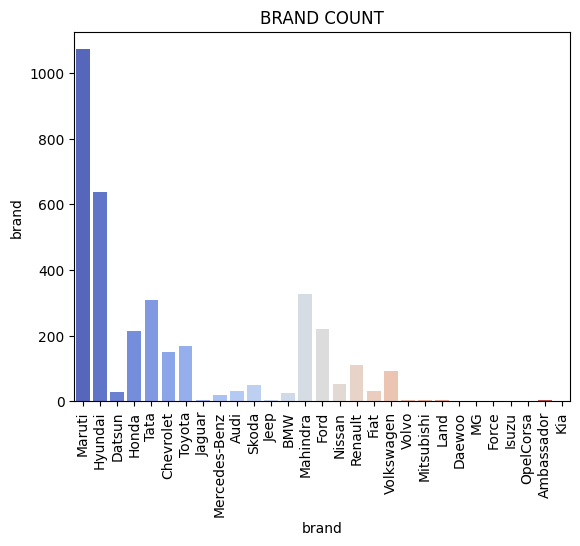

In [27]:
sns.countplot(data=df, x='brand', palette='coolwarm')
plt.xticks(rotation=90)
plt.xlabel('brand', fontsize=10, color='black')
plt.ylabel('brand', fontsize=10, color='black')
plt.title('BRAND COUNT', color='black')
plt.show()

This code creates a count plot of car brands, showing how many cars belong to each brand in the dataset, with customized axis labels, rotated x-axis names for readability, and a title **BRAND COUNT**.

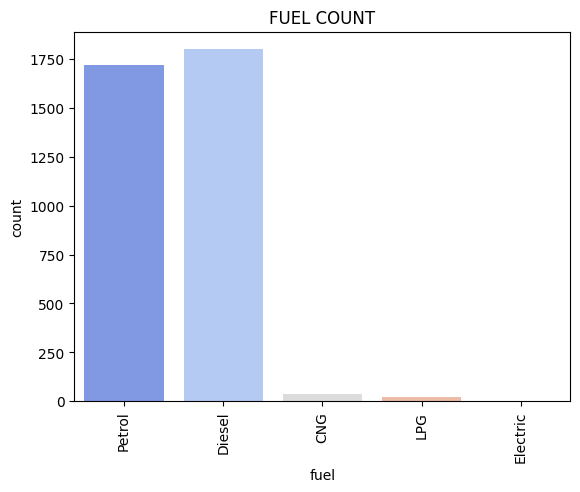

In [28]:
sns.countplot(data=df, x='fuel', palette='coolwarm')
plt.xticks(rotation=90)
plt.xlabel('fuel', fontsize=10, color='black')
plt.ylabel('count', fontsize=10, color='black')
plt.title('FUEL COUNT', color='black')
plt.show()

This code plots a count chart of fuel types, showing how many cars run on each fuel category (like Petrol, Diesel, CNG, etc.) with labeled axes and the title **FUEL COUNT**.

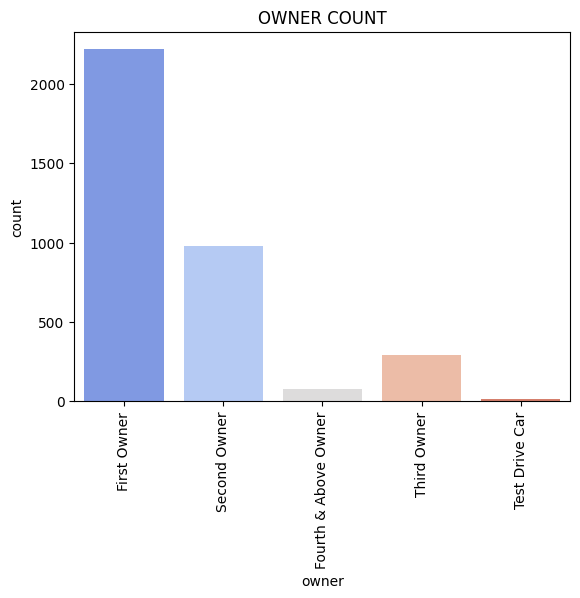

In [29]:
sns.countplot(data=df, x='owner', palette='coolwarm')
plt.xticks(rotation=90)
plt.xlabel('owner', fontsize=10, color='black')
plt.ylabel('count', fontsize=10, color='black')
plt.title('OWNER COUNT', color='black')
plt.show()

This code generates a count plot of car ownership categories, showing how many cars belong to each type of owner (First, Second, Third, Fourth & Above, Test Drive Car) with labeled axes and the title **OWNER** **COUNT.**

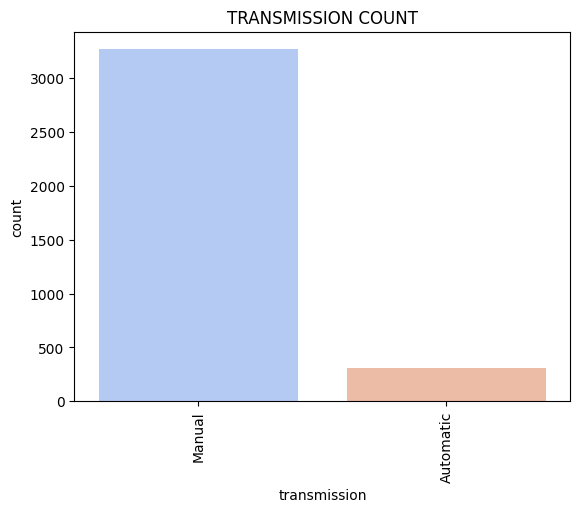

In [30]:
sns.countplot(data=df, x='transmission',palette='coolwarm')
plt.xticks(rotation=90)
plt.xlabel('transmission', fontsize=10, color='black')
plt.ylabel('count', fontsize=10, color='black')
plt.title('TRANSMISSION COUNT', color='black')
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='selling_price', ylabel='Count'>

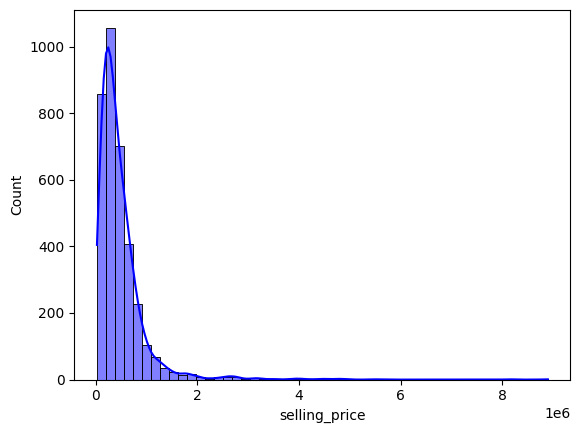

In [31]:
sns.histplot(df['selling_price'], bins=50, kde=True, color='blue')

Shows how car selling prices are distributed across the dataset.

<Axes: xlabel='fuel', ylabel='selling_price'>

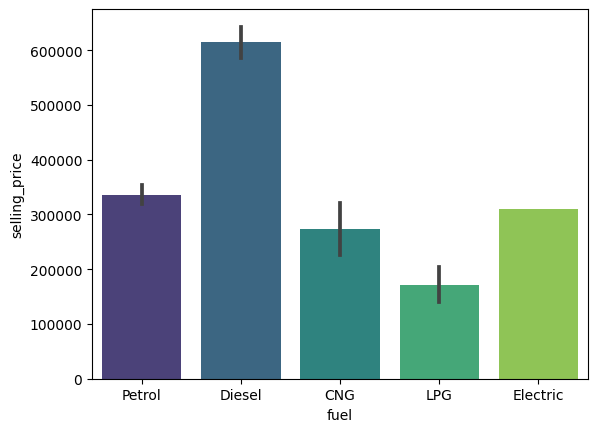

In [32]:
sns.barplot(data=df, x='fuel', y='selling_price', estimator=np.mean, palette='viridis')

Compares the average selling price of cars for each fuel type.

<Axes: xlabel='transmission', ylabel='selling_price'>

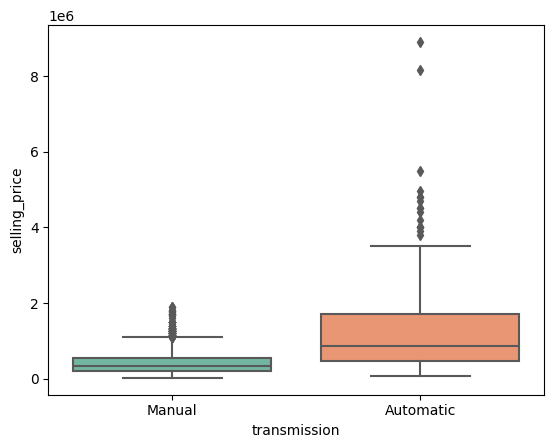

In [33]:
sns.boxplot(data=df, x='transmission', y='selling_price', palette='Set2')

Displays the variation in selling price between manual and automatic cars.

<Axes: >

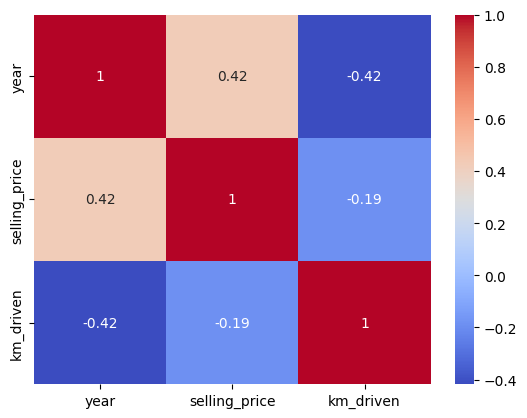

In [34]:
sns.heatmap(df[['year','selling_price','km_driven']].corr(), annot=True, cmap='coolwarm')

Highlights the correlation between year, selling price, and kilometers driven.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Maruti'),
  Text(1, 0, 'Hyundai'),
  Text(2, 0, 'Mahindra'),
  Text(3, 0, 'Tata'),
  Text(4, 0, 'Ford'),
  Text(5, 0, 'Honda'),
  Text(6, 0, 'Toyota'),
  Text(7, 0, 'Chevrolet'),
  Text(8, 0, 'Renault'),
  Text(9, 0, 'Volkswagen')])

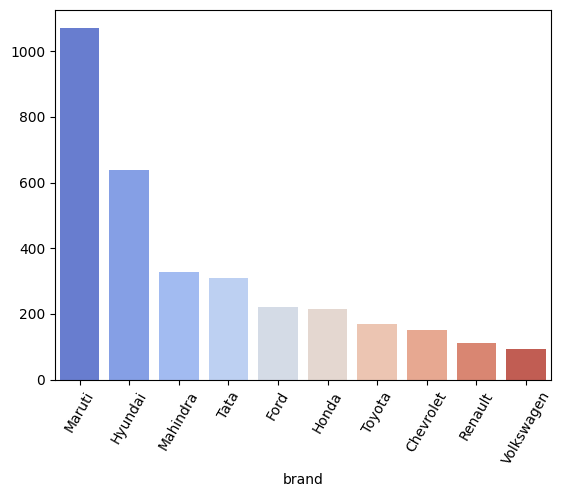

In [35]:
top_brands = df['brand'].value_counts().head(10)
sns.barplot(x=top_brands.index, y=top_brands.values, palette='coolwarm')
plt.xticks(rotation = 60)

Shows the top 10 most common car brands in the dataset.

This project analyzes a used car dataset from Car Dekho, containing details like car name, year, selling price, kilometers driven, fuel type, transmission, seller type, and ownership. Through EDA (Exploratory Data Analysis), we explored data quality, identified brand-wise and fuel-type trends, examined ownership patterns, and studied how features like year, km driven, and transmission impact car prices. Visualizations such as count plots, boxplots, and heatmaps provided key insights into pricing trends and car market behavior.

**Thank You.**